# Wine Quality Prediction

In this notebook, we will analyze the 'winequalityN.csv' datset and explore possibilities for efficient prediction of the 'quality' target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
missing_values = df.isnull().sum()
data_types = df.dtypes

In [22]:
# Imputing missing values with the median
for column in df.columns:
    if df[column].isnull().any() and df[column].dtype != 'object':
        df[column].fillna(df[column].median(), inplace=True)

# Check if there are any missing values left
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df['type'] = df['type'].replace({'white': 0, 'red': 1})
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


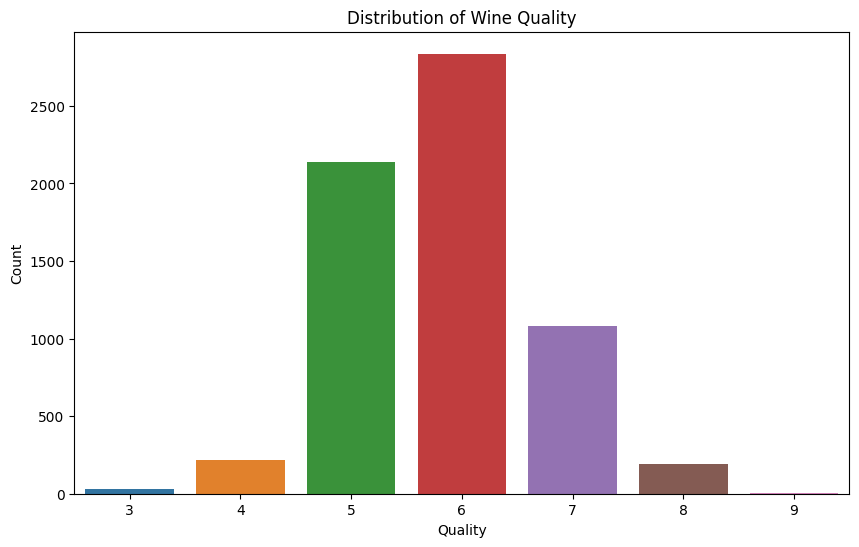

array([3, 4, 5, 6, 7, 8, 9])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the 'quality' variable
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# Check unique values in 'quality'
unique_qualities = df['quality'].unique()
unique_qualities.sort()
unique_qualities


In [7]:
quality_counts = df['quality'].value_counts()
print(quality_counts)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


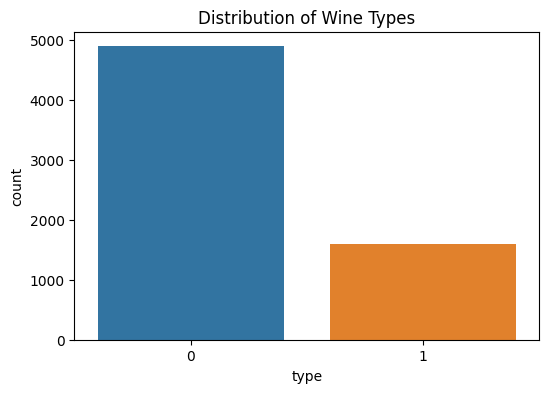

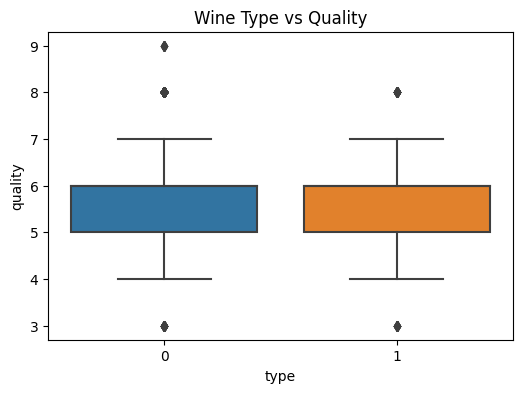

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
0,6.855768,0.278269,0.334241,6.391864,0.045779,35.308085,138.360657,0.994027,3.188234,0.489843,10.514267,5.877909
1,8.320450,0.527589,0.271169,2.538806,0.087467,15.874922,46.467792,0.996747,3.310738,0.657892,10.422983,5.636023


In [8]:
# Analysis of the 'type' feature

# Countplot to see the distribution of wine types
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df)
plt.title("Distribution of Wine Types")
plt.show()

# Box plot to see the relationship between wine type and quality
plt.figure(figsize=(6, 4))
sns.boxplot(x='type', y='quality', data=df)
plt.title("Wine Type vs Quality")
plt.show()

# Checking average values of features based on wine type
mean_values_by_type = df.groupby('type').mean()
mean_values_by_type


In [9]:
descriptive_stats = df.describe()
descriptive_stats.T  # Transposed for better readability

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.246114,0.430779,0.00000,0.00000,0.00000,0.00000,1.00000
fixed acidity,6497.0,7.216246,1.295779,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339630,0.164557,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318718,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443574,4.757585,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056039,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218384,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000


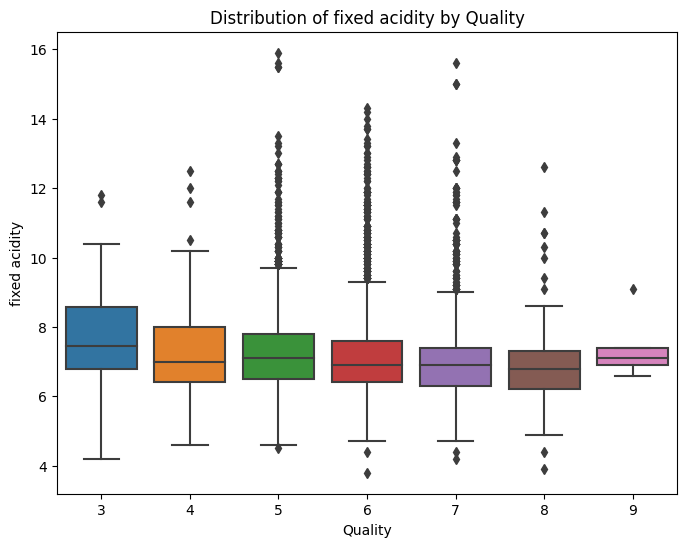

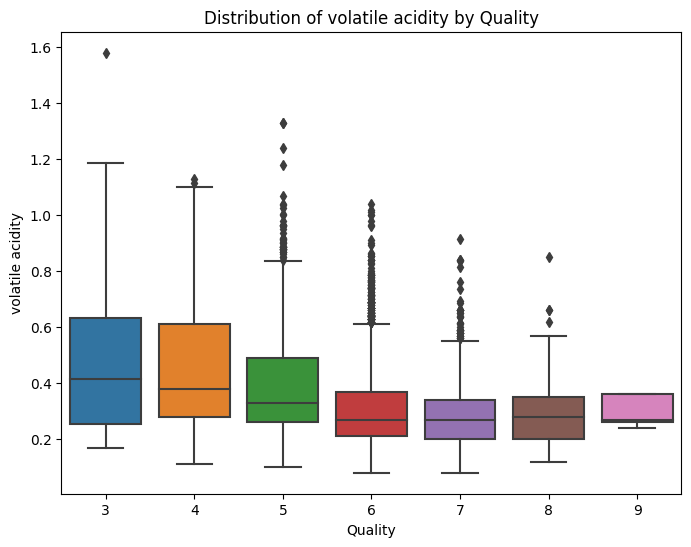

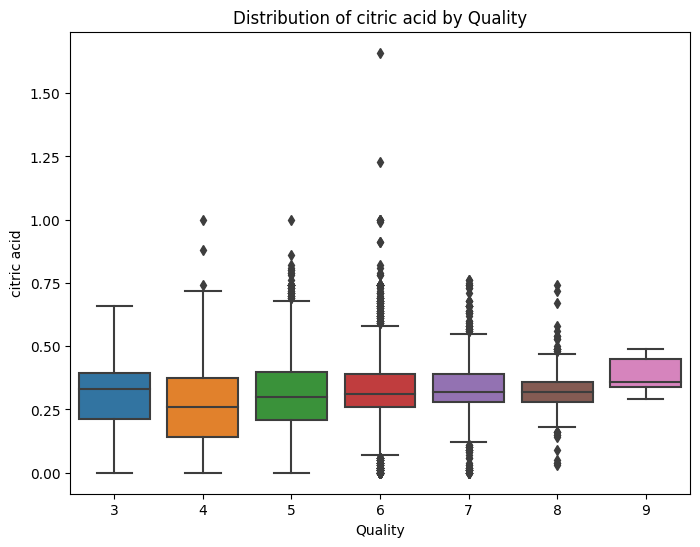

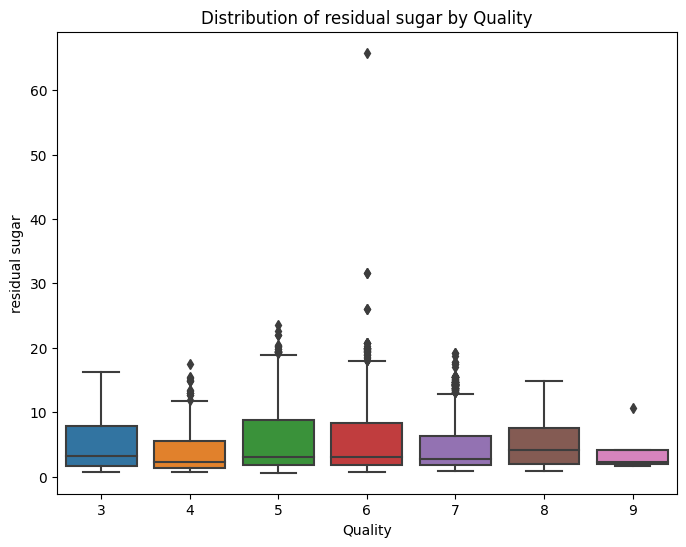

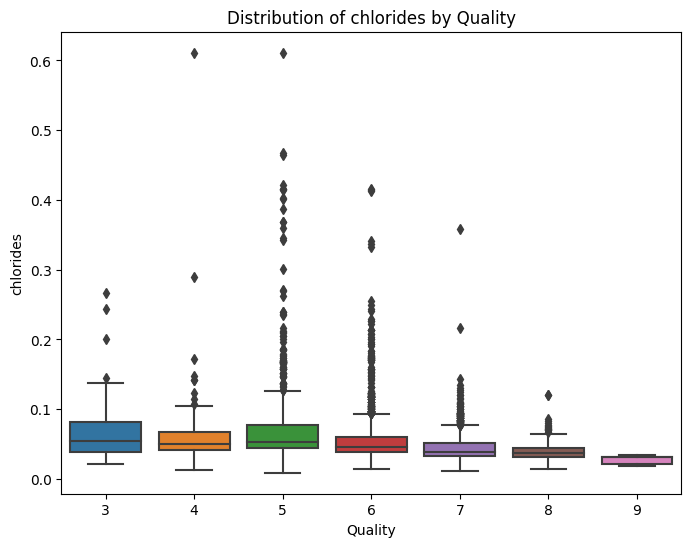

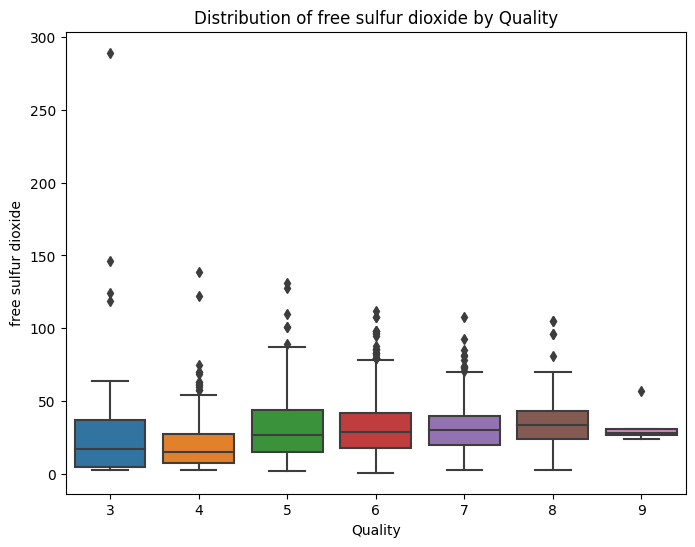

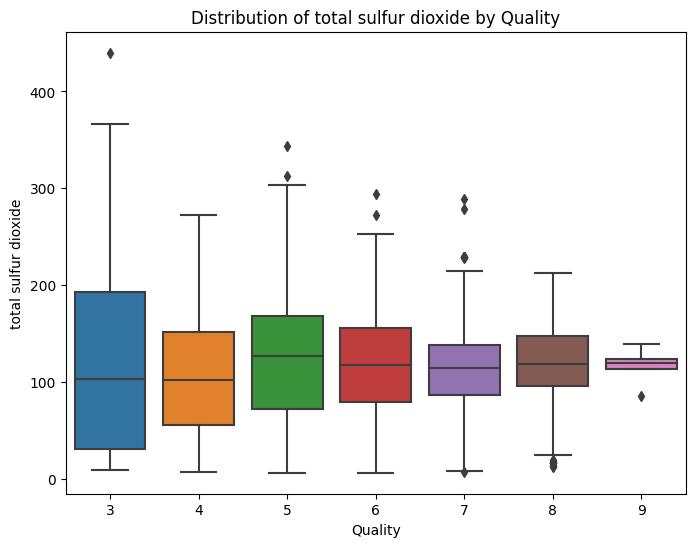

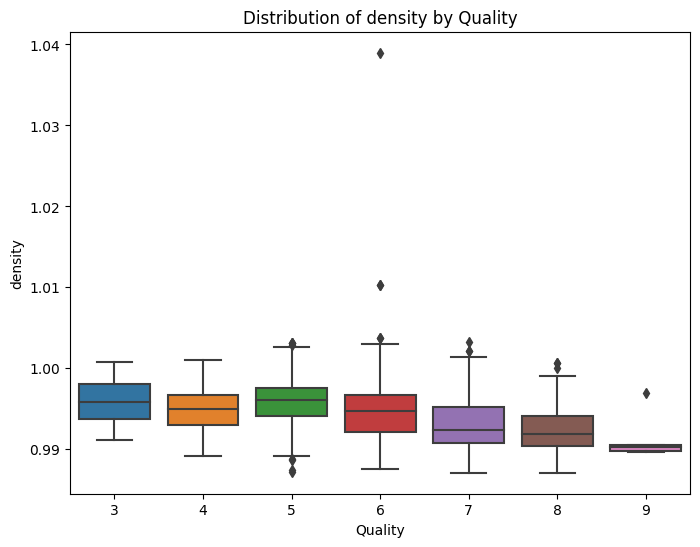

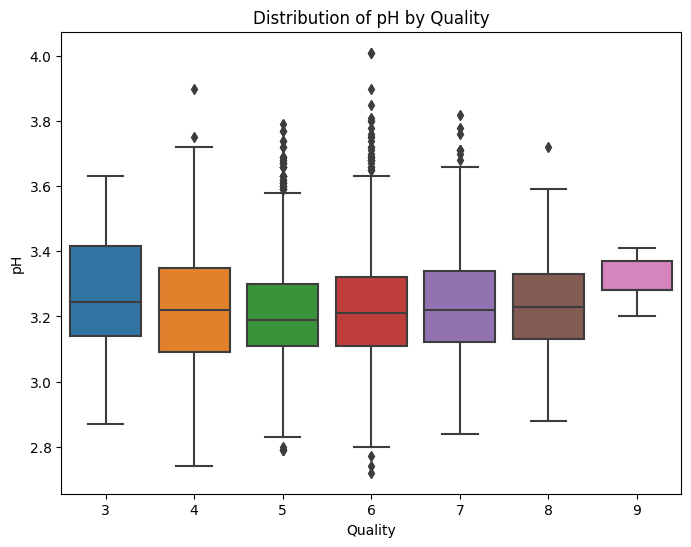

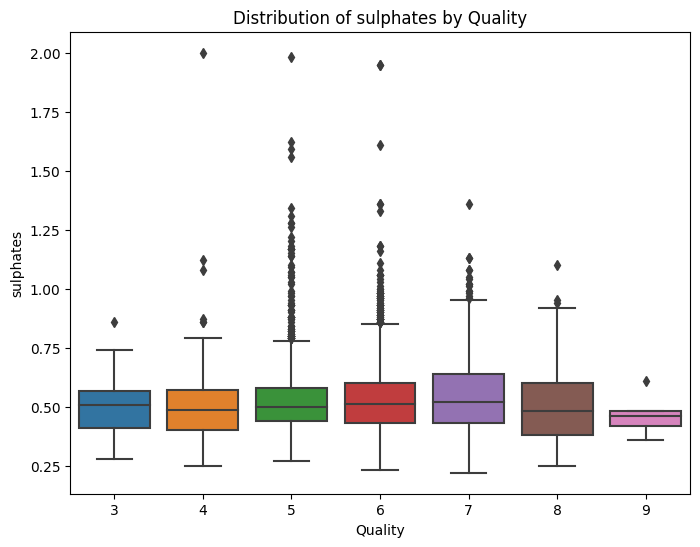

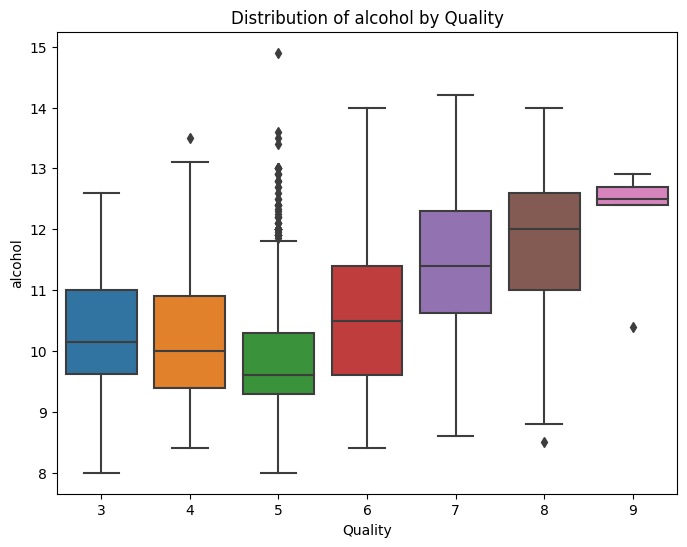

In [10]:
numeric_features = df.iloc[:, 1:12]
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

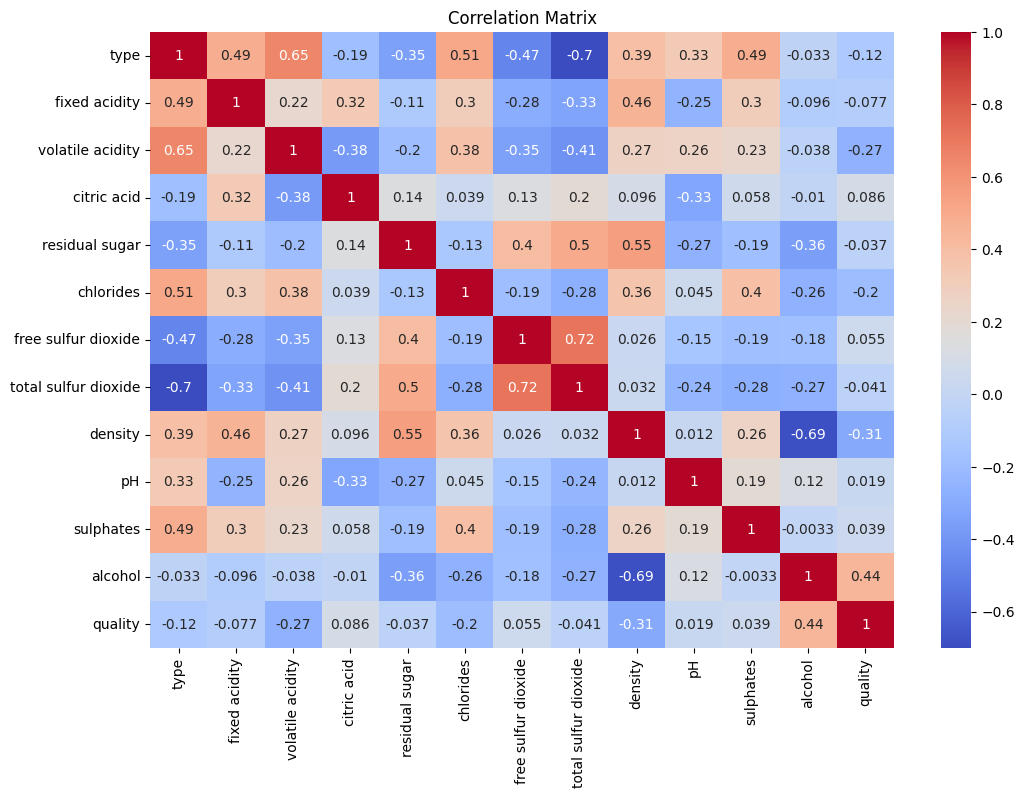

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
def generate_sample_for_quality(df, deviation_factor=0.1):
    sample = {}
    wine_types = [0, 1]
    quality_score = [3,4,5,6,7,8,9]
    quality_score = np.random.choice(quality_score)
    selected_type = np.random.choice(wine_types)
    while (quality_score==9 and selected_type==1):
      quality_score = np.random.choice(quality_score)
      selected_type = np.random.choice(wine_types)

    quality_type_df = df[(df['quality'] == quality_score) & (df['type'] == selected_type)]

    sample['type'] = selected_type

    for feature in quality_type_df.columns:
        if feature not in ['quality', 'type']:
            mean_value = quality_type_df[feature].mean()
            std_dev = quality_type_df[feature].std() * deviation_factor
            sample[feature] = np.random.uniform(mean_value - std_dev, mean_value + std_dev)

    sample['quality'] = quality_score

    return sample

# Example usage
synthetic_sample = generate_sample_for_quality(df)
print(synthetic_sample)

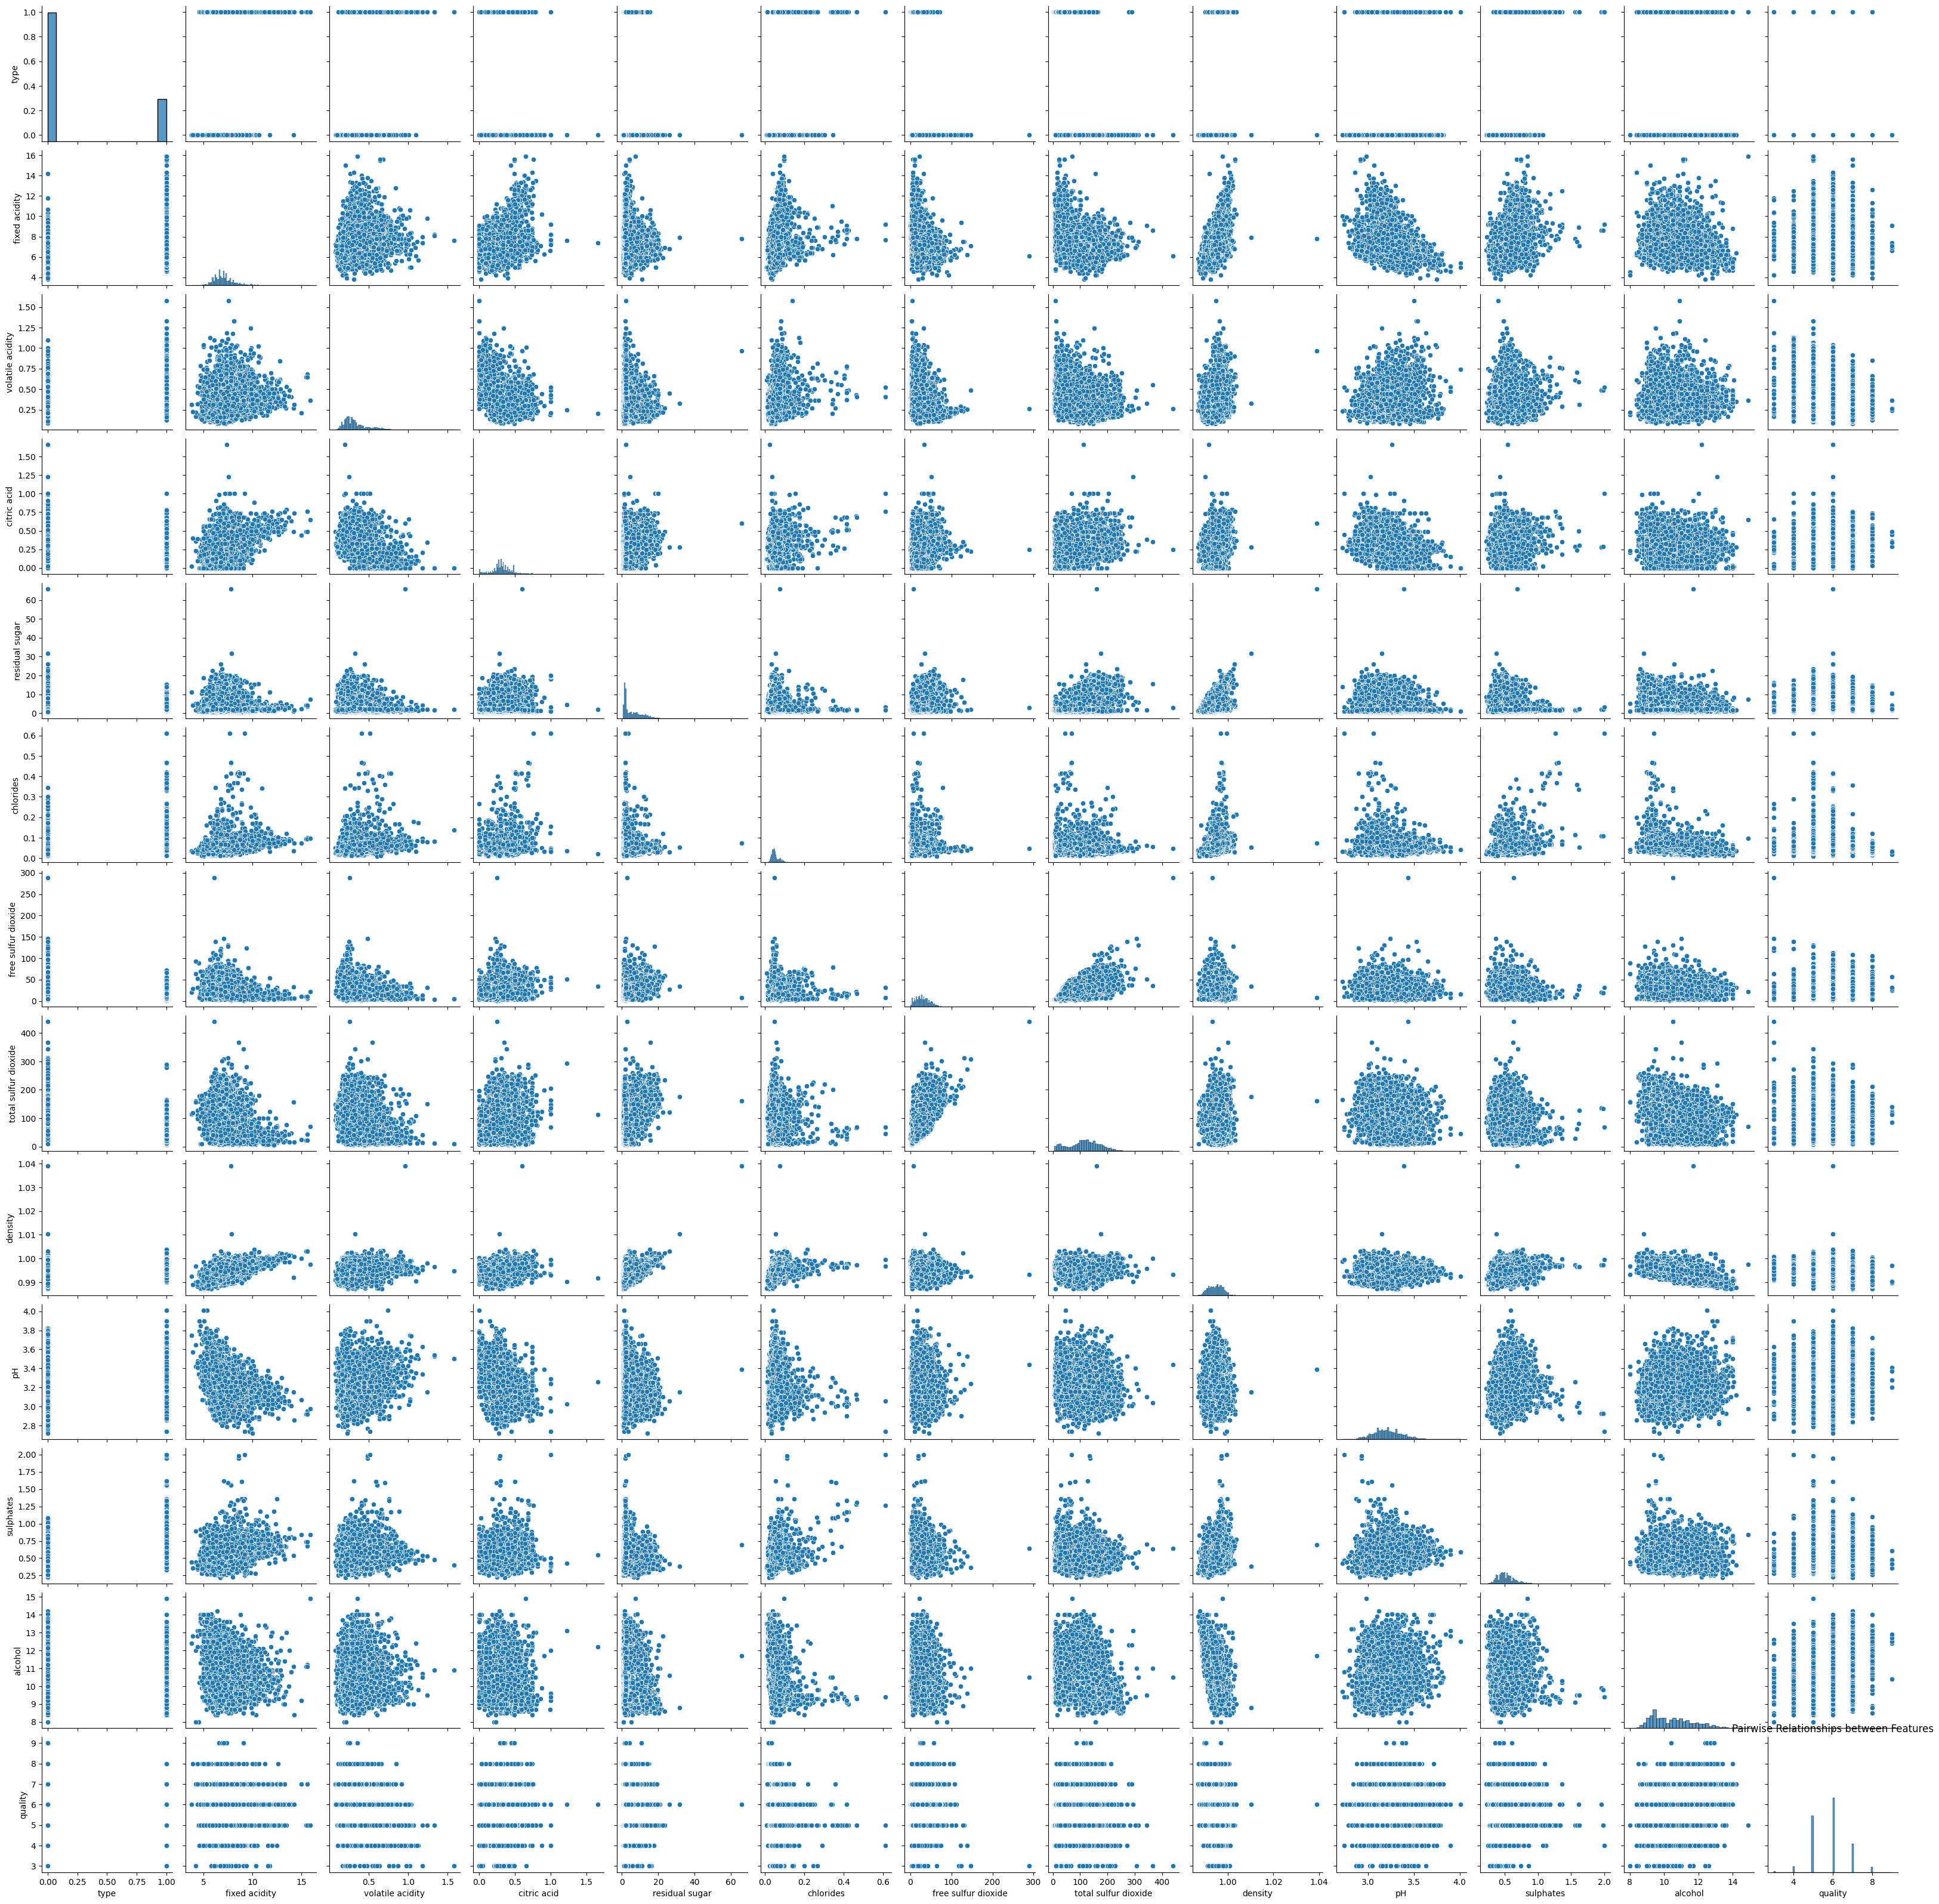

In [12]:
sns.pairplot(data=df, vars=list(df.columns))  # Replace with your feature names
plt.title('Pairwise Relationships between Features')
plt.show()

In [24]:
# Assuming 'y' contains your target variable with class labels
y = df['quality']
# Calculate class frequencies
class_labels = [3,4,5,6,7,8,9]
class_frequencies = [np.sum(y == label) for label in class_labels]

# Compute class weights inversely proportional to class frequencies
total_samples = len(y)
class_weights = {class_label: total_samples / (len(class_labels) * class_frequency) for class_label, class_frequency in zip(class_labels, class_frequencies)}

# Print or use the class weight dictionary as needed
print("Class Weights:", class_weights)


Class Weights: {3: 30.938095238095237, 4: 4.296957671957672, 5: 0.4341173326206067, 6: 0.3272718114043925, 7: 0.8601880047663181, 8: 4.8090303478904515, 9: 185.62857142857143}


In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Outlier Analysis using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determining the outliers
outlier_df = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

for col in numerical_columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    #df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [25]:
#df = df.drop(columns=['citric acid', 'fixed acidity', 'residual sugar'])
df = df.drop(columns=['residual sugar', 'fixed acidity', 'citric acid'])
df

,type,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0.270,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,0.300,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,0.280,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,0.230,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,0.230,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
6492,1,0.600,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,0.550,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6
6494,1,0.510,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,0.645,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


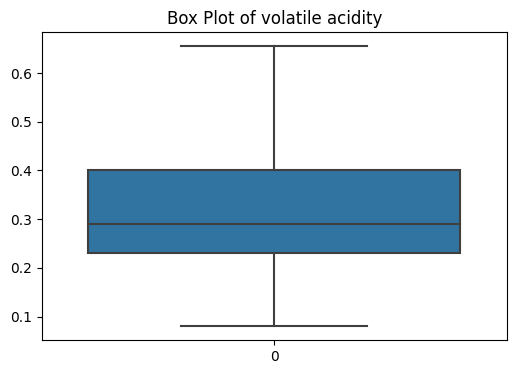

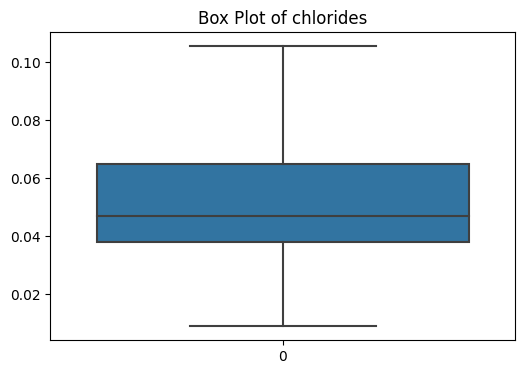

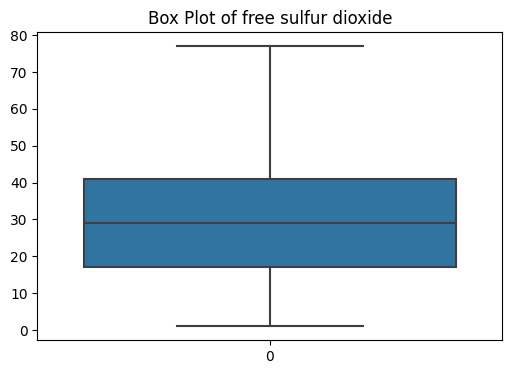

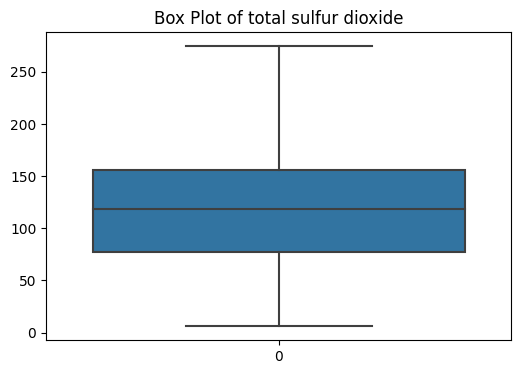

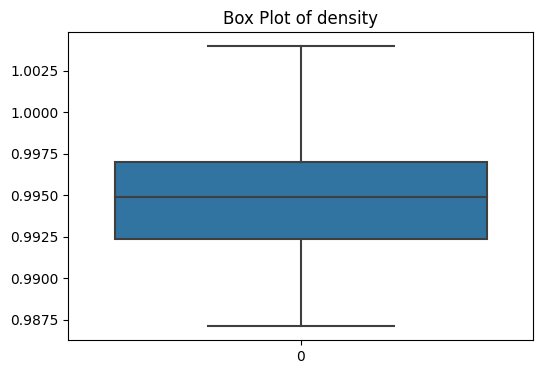

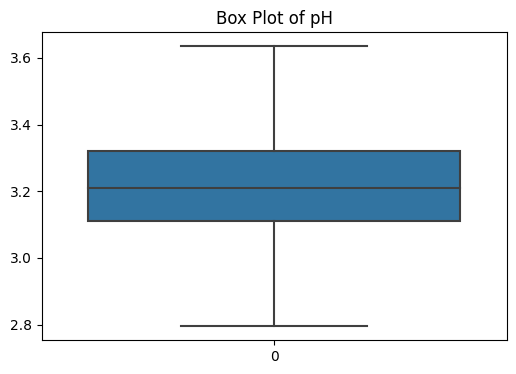

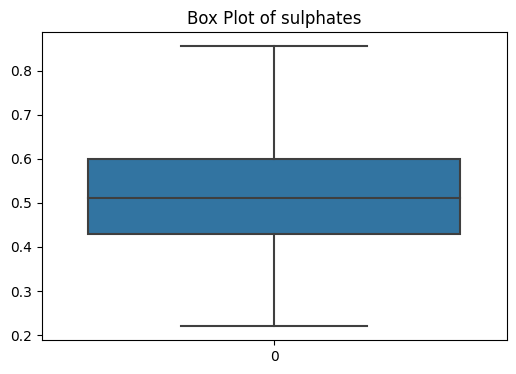

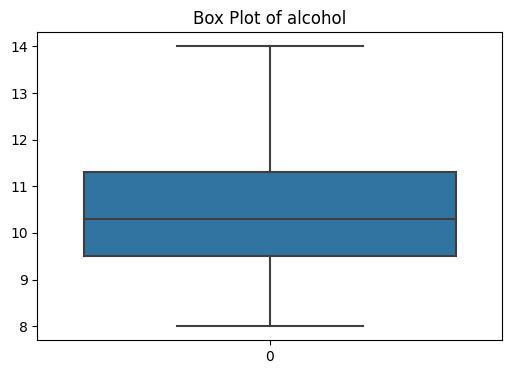

In [16]:
for col in df.iloc[:, 1:9]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_processed = df.drop(columns=['quality'])
y = df['quality']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5197, 9), (1300, 9), (5197,), (1300,))

## Classification Approach

In [18]:
# Install imbalanced-learn if available
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

classifier = RandomForestClassifier(random_state=42, class_weight=class_weights)
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [28]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have already loaded and preprocessed your dataset, and created X and y

# Split your dataset into training and testing sets

# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=50, class_weight = class_weights)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.88      0.16      0.27        43
           5       0.72      0.75      0.74       428
           6       0.65      0.78      0.71       567
           7       0.73      0.54      0.62       216
           8       0.92      0.31      0.46        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.56      0.36      0.40      1300
weighted avg       0.70      0.69      0.68      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


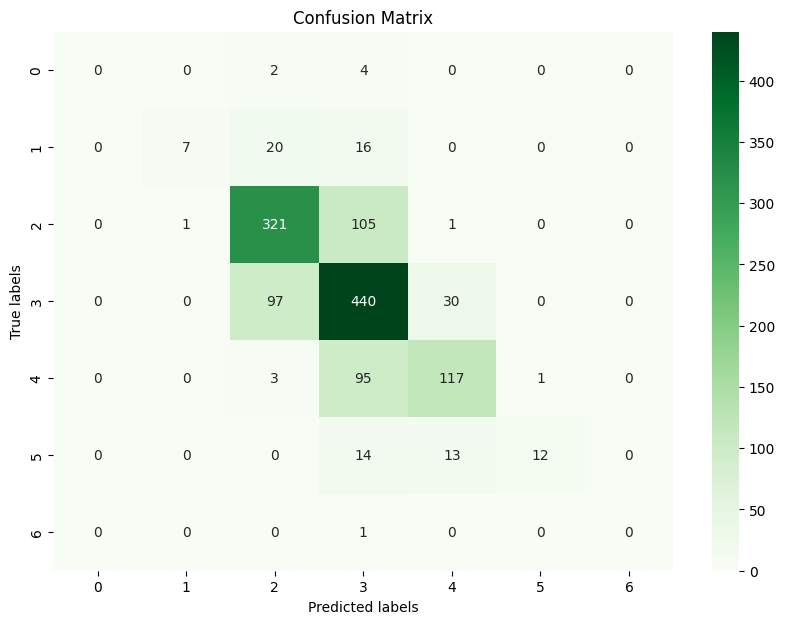

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


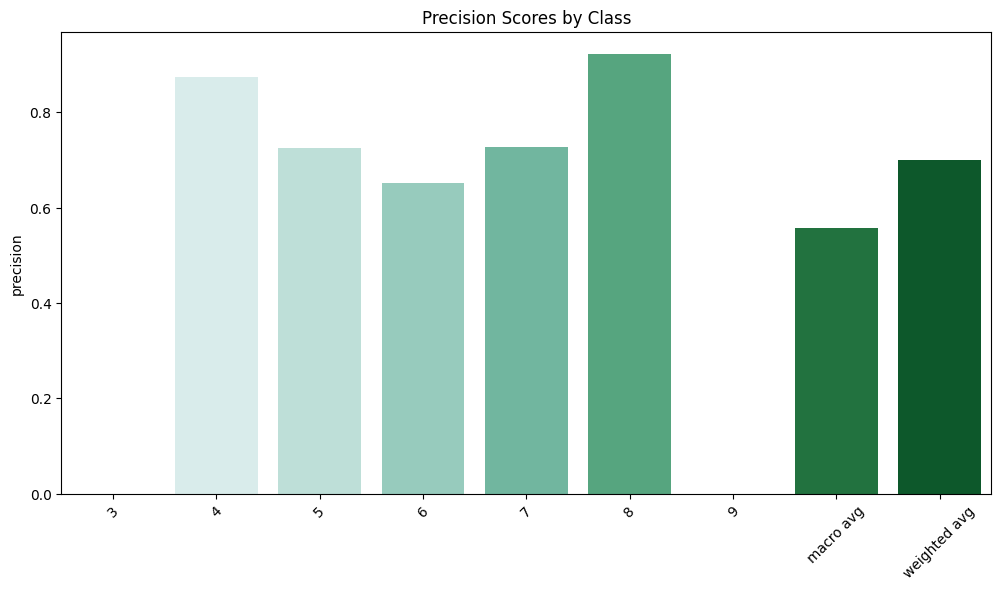

In [31]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Visualization
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.drop(['accuracy'], inplace=True)  # Drop the total accuracy row
report_df['support'] = report_df['support'].apply(int)  # Convert support to int

# Plotting Precision, Recall, and F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(data=report_df, x=report_df.index, y='precision', palette='BuGn')
plt.title('Precision Scores by Class')
plt.xticks(rotation=45)
plt.show()

In [33]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creating the ADASYN object
adasyn = ADASYN(n_neighbors = 2)

# Applying ADASYN to generate the new dataset
X_adasyn, y_adasyn = adasyn.fit_resample(X_processed, y)

# Splitting the oversampled dataset
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

# Training the Balanced Random Forest Classifier
brf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42,n_estimators=300, max_depth=30, min_samples_leaf=1, min_samples_split=2)
brf_classifier.fit(X_train_adasyn, y_train_adasyn)

# Predicting on the test set
y_pred_brf = brf_classifier.predict(X_test_adasyn)

# Evaluation
accuracy_brf = accuracy_score(y_test_adasyn, y_pred_brf)
classification_rep_brf = classification_report(y_test_adasyn, y_pred_brf)

(accuracy_brf, classification_rep_brf)


(0.8946572580645161,
 '              precision    recall  f1-score   support\n\n           3       0.99      1.00      1.00       583\n           4       0.93      0.99      0.96       585\n           5       0.80      0.72      0.76       537\n           6       0.73      0.64      0.68       565\n           7       0.81      0.90      0.85       557\n           8       0.96      1.00      0.98       583\n           9       1.00      1.00      1.00       558\n\n    accuracy                           0.89      3968\n   macro avg       0.89      0.89      0.89      3968\nweighted avg       0.89      0.89      0.89      3968\n')

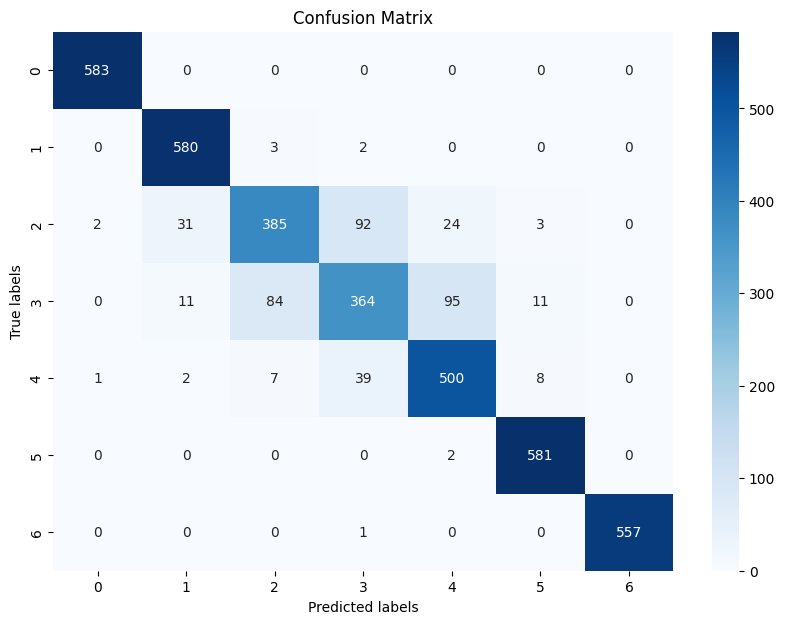

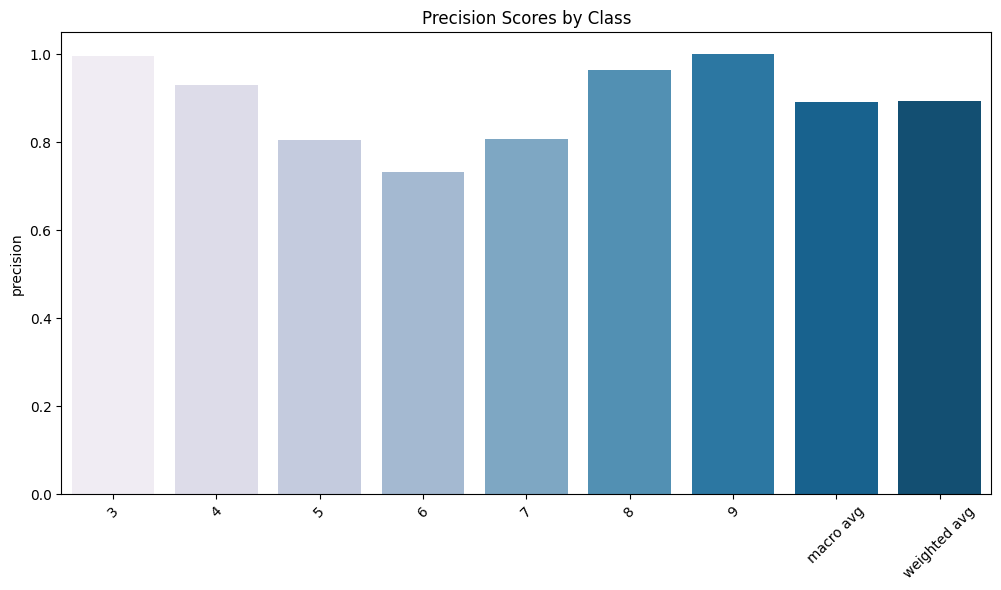

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test are your true labels and y_pred are your model's predictions

# Confusion Matrix
conf_mat = confusion_matrix(y_test_adasyn, y_pred_brf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report Visualization
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test_adasyn, y_pred_brf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.drop(['accuracy'], inplace=True)  # Drop the total accuracy row
report_df['support'] = report_df['support'].apply(int)  # Convert support to int

# Plotting Precision, Recall, and F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(data=report_df, x=report_df.index, y='precision', palette='PuBu')
plt.title('Precision Scores by Class')
plt.xticks(rotation=45)
plt.show()

# Repeat similar plots for recall and f1-score


## Regression Approach

In [35]:
from sklearn.utils import class_weight
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5608837903044752, 0.26535536562782114)

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initializing models
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Training and evaluating each model
models = {'Decision Tree': decision_tree_model,
          'Random Forest': random_forest_model,
          'Gradient Boosting': gradient_boosting_model}

performance = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    performance[model_name] = (mse, r2)

performance

{'Decision Tree': (0.6730769230769231, 0.1184049911840499),
 'Random Forest': (0.3723062307692308, 0.5123539323012536),
 'Gradient Boosting': (0.46733448723696797, 0.3878860836407154)}

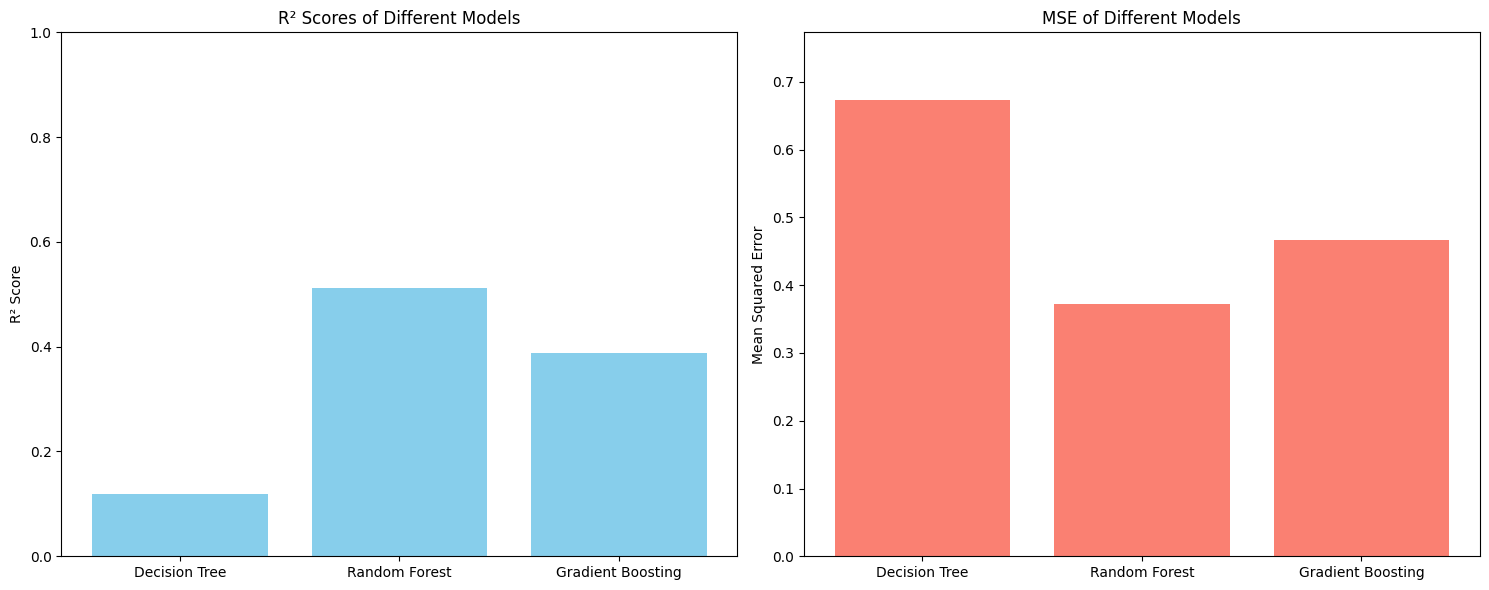

In [37]:
# Extracting R² scores and MSEs for visualization
model_names = list(performance.keys())
r2_scores = [performance[model][1] for model in model_names]
mses = [performance[model][0] for model in model_names]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# R² Scores Bar Chart
ax[0].bar(model_names, r2_scores, color='skyblue')
ax[0].set_title('R² Scores of Different Models')
ax[0].set_ylabel('R² Score')
ax[0].set_ylim(0, 1)

# MSE Bar Chart
ax[1].bar(model_names, mses, color='salmon')
ax[1].set_title('MSE of Different Models')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_ylim(0, max(mses) + 0.1)

plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at a leaf node
}

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [39]:
random_forest_model = RandomForestRegressor(random_state=42, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.3663793879307693
R² Score: 0.5201169009683981


In [41]:
! pip install xgboost

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")

XGBoost Mean Squared Error: 0.40816112783725467
XGBoost R² Score: 0.4653912491174669


In [44]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'gamma': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [45]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42, gamma=0.1, learning_rate=0.1, max_depth=10,n_estimators=100, subsample=0.7)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")

XGBoost Mean Squared Error: 0.3785445524539488
XGBoost R² Score: 0.5041829891711662
